# What is the best-selling category?

## Importing libraries to use

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing dataframes to use

In [29]:
orders_df = pd.read_csv('../../data/interim/orders_dataset_clean.csv').drop(columns=['customer_id','ID','order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']).sort_values(by='order_id')

In [30]:
items_df = pd.read_csv('../../data/interim/order_items_dataset.csv').drop(columns=['seller_id','item_id','id','shipping_limit_date','price','freight_value']).sort_values(by='order_id')
items_df.drop_duplicates(inplace=True)


In [31]:
products_df = pd.read_csv('../../data/interim/products_dataset.csv').drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'])
products_df.columns = ['product_id','category_id']

In [32]:
categories_df = pd.read_csv('../../data/interim/product_category_name_translation.csv').drop(columns=['product_category_name'])

## Merging products_df with categories_df

In [33]:
product_id_category_df = products_df.merge(categories_df,on='category_id',how='left')
product_id_category_df.drop(columns='category_id',inplace=True)
product_id_category_df

,product_id,product_category_name_english
0,0368744ea61d6163219e3bcbbbac3680,health_beauty
1,d3153ef55a46de1972249b0a044c5bd7,health_beauty
2,a7ac695869dbbe03164408a2f081e0e2,health_beauty
3,090621b8ea8b2c856067283a91b493e9,health_beauty
4,e034c021254ff4d8da4e936e047967af,health_beauty
...,...,...
32946,b0a0c5dd78e644373b199380612c350a,NaN
32947,10dbe0fbaa2c505123c17fdc34a63c56,NaN
32948,bd2ada37b58ae94cc838b9c0569fecd8,NaN
32949,fa51e914046aab32764c41356b9d4ea4,NaN


## Merging products_categories_df with items_df

In [34]:
order_id_category_df = items_df.merge(product_id_category_df,on='product_id',how='left')
order_id_category_df.drop(columns=['product_id'],inplace=True)
order_id_category_df

,order_id,product_category_name_english
0,1,home_construction
1,2,auto
2,3,perfumery
3,4,bed_bath_table
4,5,bed_bath_table
...,...,...
102419,99436,construction_tools_lights
102420,99437,stationery
102421,99438,auto
102422,99439,health_beauty


## Merging order_id_category_df with orders_df

In [35]:
product_category_df = orders_df.merge(order_id_category_df,on='order_id',how='left')
product_category_df.drop(columns=['order_id'],inplace=True)
product_category_df.sort_values(by='product_category_name_english')
product_category_df.columns = ['product_category']
product_category_df

,product_category
0,home_construction
1,home_construction
2,home_construction
3,home_construction
4,home_construction
...,...
103075,construction_tools_lights
103076,stationery
103077,auto
103078,health_beauty


### Filling NaN values with category "others"

In [36]:
product_category_df.fillna('others',inplace=True)

### Adding column with ones to be able group and count values

In [37]:
product_category_df['ones'] = 1

### Grouping, counting and sorting values

In [38]:
grouping = product_category_df.groupby('product_category').sum()
grouping.sort_values(by='ones',inplace=True, ascending=False)
grouping

,ones
product_category,
bed_bath_table,11000
health_beauty,8697
sports_leisure,7611
computers_accessories,6659
furniture_decor,6557
...,...
food_preparators,13
cds_dvds_musicals,12
pc_gamer,8


### Obtaining x values and y values

In [39]:

x_values = grouping.index
y_values = grouping.values
y_values = y_values.tolist()
y_values = np.squeeze(y_values)
x_values = [x_value.replace('_',' ') for x_value in x_values]

## Spliting x and y values

### Separating top 10

In [40]:
x_top10 = [x_values[i] for i in range(10)]
y_top10 = [y_values[i] for i in range(10)]

### Separating others category

In [41]:
x_others = [x_value for x_value in x_values if x_value == 'others']
y_others = [y_value for y_value in y_values if y_value == 2168]

### Rest of categories

In [42]:
x_11_to_16 = [x_values[i] for i in range(10,16)]
y_11_to_16 = [y_values[i] for i in range(10,16)]

x_rest = [x_values[i] for i in range(17,len(x_values))]
y_rest = [y_values[i] for i in range(17,len(y_values))]

## Creating bar plot

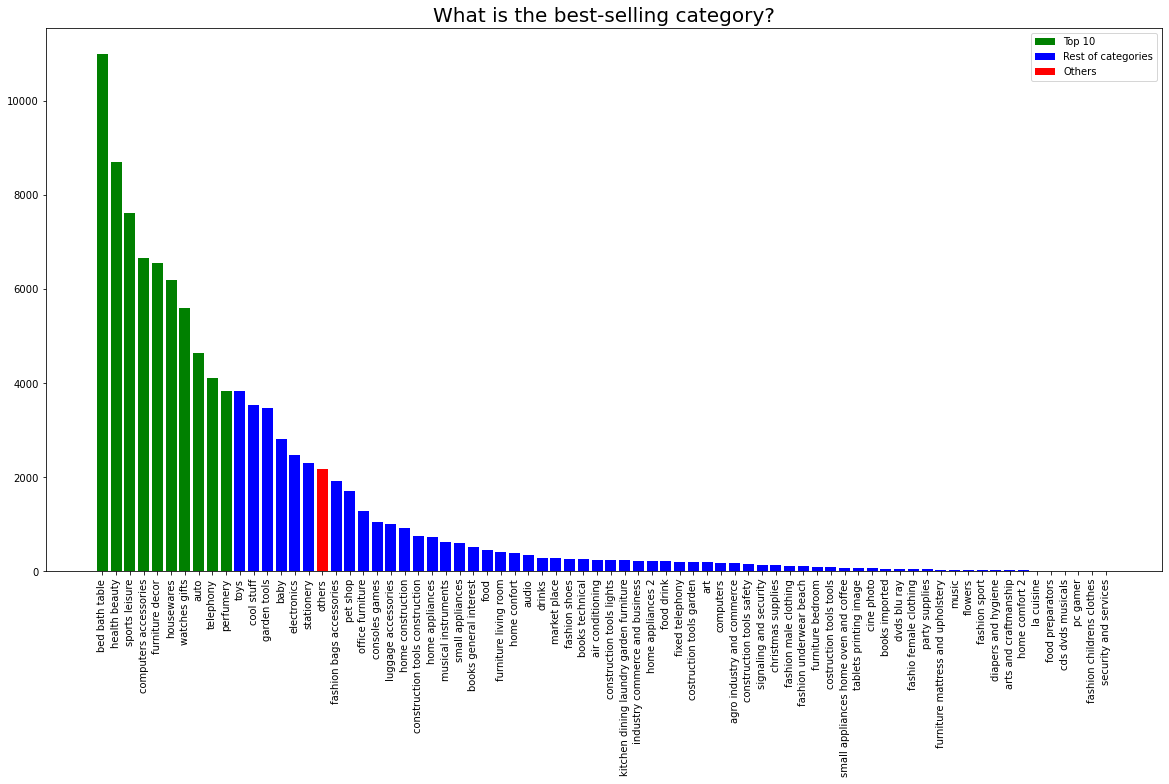

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.bar(x_top10,y_top10,color='green',label='Top 10')
ax.bar(x_11_to_16,y_11_to_16,color='blue',label='Rest of categories')
ax.bar(x_others,y_others,color='red',label='Others')
ax.bar(x_rest,y_rest,color='blue')
ax.legend()
plt.xticks(rotation='vertical')
plt.title('What is the best-selling category?', fontsize=20)
plt.savefig('./figures/What-is-the-best-selling-category.png',facecolor='white',bbox_inches='tight')
plt.show()